# Model Training & Algorithm Comparison
In this notebook, we will:
1. Split the dataset into training and testing sets.  
2. Train multiple algorithms on the training set.  
3. Use **10-fold cross-validation** to evaluate accuracy.  
4. Compare results visually using a bar chart, box plot and accuracy table.

This step helps us identify the best-performing models before tuning.

### Step 1: Set Project Root for Python Imports

In [1]:
import os
import sys

# Add project root to sys.path
sys.path.append(os.path.abspath(".."))

### Step 2: Load Iris dataset
We first load the Iris dataset into a Pandas DataFrame and preview the first 5 rows.

In [2]:
from src.data import load_data
df =load_data(r"D:\Thiru\ML_Projects\Iris-Species-Prediction\Data\processed\cleaned_iris.csv")

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 3: Separate features (X) and target (y)
- Target variable: `Species`
- Features: all other columns

In [3]:
from src.model import split_x_y
X, Y = split_x_y(df)

Features Columns: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


Target Columns: Species


### Step 4: Split data into training and testing sets
- 80% training, 20% testing
- Random state for reproducibility

In [4]:
from src.model import split_train_test
X_train, X_test, Y_train, Y_test = split_train_test(X, Y)

Training Sample: 120
Testing Sample: 30


### Step 5: Train ML models
We will train:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbors
- SVM
- LinearDiscriminantAnalysis
- GaussianNB

In [5]:
from src.model import algo_comparison
results, names, res = algo_comparison(X_train, Y_train)

LR:95.000000%
DT:92.500000%
RFC:93.333333%
KNN:94.166667%
SVC:95.000000%
LDA:97.500000%
NB:94.166667%


### Step 6: Compare accuracy using bar plot
We can visualize which model performed best.

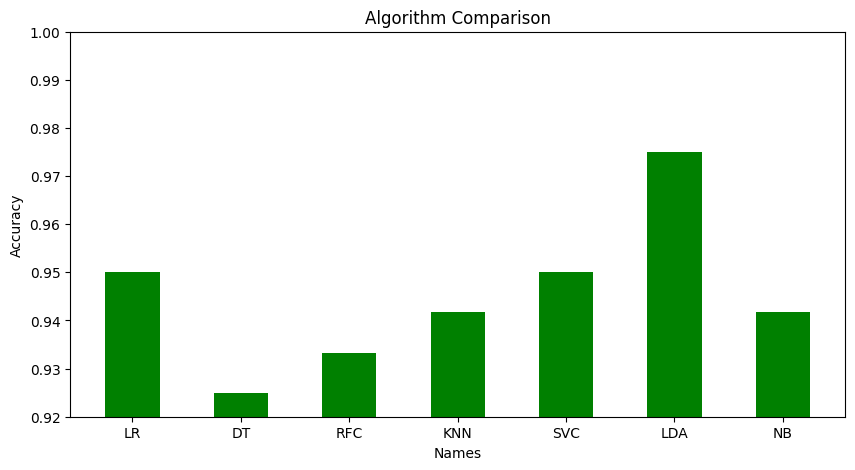

In [6]:
from src.model import plot_algo_comparison
plot_algo_comparison(names, res)

### Insights
- LDA is the top performer with 97.5% accuracy.
- LR and SVC are strong contenders at 95%.
- KNN and NB perform well at 94.17%.
- RFC and DT lag slightly behind at 93.33% and 92.5%, respectively.
- Overall, LDA is the best choice, with linear models and SVC as solid alternatives.

### Step 7: Compare accuracy using box plot
We can visualize which model performed best.

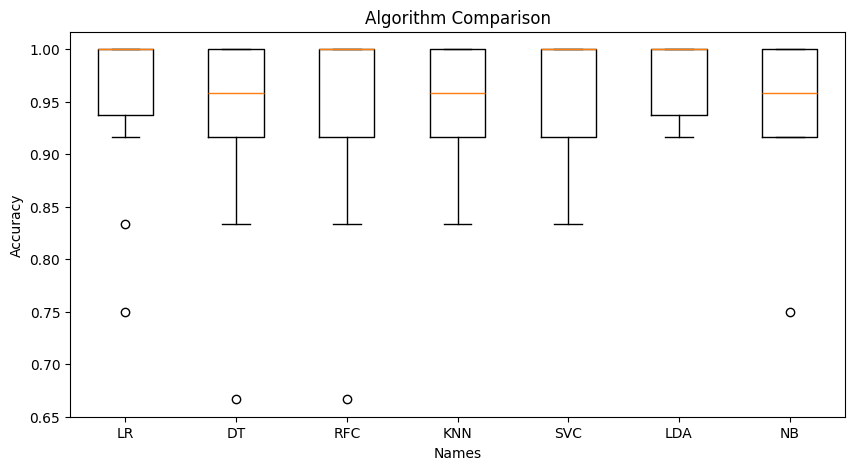

In [7]:
from src.model import boxplot_algo_comparison
boxplot_algo_comparison(results, names)

### Insights
- LDA shows the highest median accuracy (~97.5%) and low variance, indicating consistent performance across folds.
- LR and SVC also perform strongly (~95%) with relatively stable results.
- KNN and NB have moderate performance (~94.17%) with slightly more variability.
- RFC and DT show lower median accuracies (~93.33% and 92.5%) and higher spread, suggesting less stable performance.
- Overall, LDA is the most reliable model, while linear models and SVC provide strong, stable alternatives.

### step 8: Accurancy table
Create a DataFrame to summarize model accuracies

In [8]:
from src.model import accu_table
accu_table(names, res)

  Models  Mean_Accuracy
5    LDA          97.50
4    SVC          95.00
0     LR          95.00
3    KNN          94.17
6     NB          94.17
2    RFC          93.33
1     DT          92.50


### Insights
- Clear table showing each model's mean accuracy
- Best models can be selected for final evaluation (usually LDA or SVC)

## Summary

- Dataset split:80% training / 20% testing  
- Trained 7 ML algorithms:
  - Logistic Regression (LR) 
  - Decision Tree (DT)
  - Random Forest (RFC) 
  - K-Nearest Neighbors (KNN)  
  - Support Vector Classifier (SVC)
  - Linear Discriminant Analysis (LDA)  
  - Naive Bayes (NB)
- Evaluation method: ***10-fold Stratified Cross-Validation***  
- Visualizations:Bar Chart and Box Plot  
- Accuracy table: Models ranked by mean accuracy  

### Key Takeaways

- ***LDA*** achieved the ***highest accuracy (97.5%)***, making it the top-performing model.  
- ***Logistic Regression (95%)*** and ***SVC (95%)*** are strong alternatives, showing stable performance.  
- ***KNN (94.17%)*** and ***Naive Bayes (94.17%)*** performed reasonably well with slight variability.  
- ***Random Forest (93.33%)*** and ***Decision Tree (92.5%)*** performed moderately, indicating less stability or minor overfitting.  
- Overall, ***ensemble methods*** are useful, but for this dataset, ***LDA and linear models*** outperform most others.  
- Bar and box plots clearly highlight ***accuracy trends and consistency*** across models.
